# A Multiagent transportation system

Auteur : Philippe Mathieu, [CRISTAL Lab](https://www.cristal.univ-lille.fr/), [SMAC Team](https://www.cristal.univ-lille.fr/?rubrique26&id=7), [University of Lille](http://www.univ-lille1.fr), email : philippe.mathieu@univ-lille.fr

Contributeurs : Corwin Fèvre (CRISTAL/SMAC , CRISTAL/OSM)

Creation : 15/01/2020


## Principe général


Cette feuille fait suite à [mas_basics_fr.ipynb](mas_basics_fr.ipynb) qui donnait les bases de la construction d'un système multi-agents sur un reseau social.
Nous vous montrons ici, comment réaliser une petite simulation d'un système de co-voiturage à l'aide des agents.

## L'agent

Dans sa forme la plus simple, un agent est une entité dotée d'une seule
capacité, celle de décider quoi faire. Personne ne lui indique ce qu'il doit faire,
c'est lui qui décide ! C'est le principe d'**autonomie**. Il suffit juste de lui donner la
parole pour qu'il agisse. Lors de sa prise de parole, l'agent réalise sémantiquement 3 étapes différentes : la **perception** de son entourage, la **decision** en fonction de son propre état et de ce qu'il a perçu, puis l'**action** effective qu'il réalise in fine. Idéalement chaque agent ne peut faire qu'une seule action lors de sa prise de parole.

In [222]:
class Agent:
    def __init__(self,name) :
        self.name=name
        self.current_value = 1
            
    def step_calcul_value(self):
        self.current_value+=1
        
    def step_sum_values(self, agents_values):
        print("Je suis ",self.name, "et notre somme est de ",sum(agents_values))
        

Il est bien sûr possible de créer plusieurs agents et de les interroger directement.

In [223]:
#a1 = Agent("philippe")
#a2 = Agent("corwin")
#a1.decide()
#a2.decide()

## Le système multiagent

Bien évidemment, un système multi-agent utilise des dizaines voire des
milliers d'agents. Il est alors necessaire de créer une classe
permettant de les manager. En général la méthode qui lance la
simulation se nomme `run` et prend en paramètre le nombre de prises de
paroles.
Afin d'assurer le principe d'**équité** on s'assurerque chaque agent a
au moins une fois la parole avant qu'un autre agent ne l'ait deux
fois. On s'appuie pour cela sur la notion de tour de parole. Chaque tour de
parole donne aléatoirement la parole à l'ensemble des agents, avant de
recommencer. Un tour de parole constitue sémantiquement une unité de temps, un tick d'horloge. La classe SMA s'écrit :


In [224]:
import random
class SMA:
    def __init__(self):
        self.tick=0
        self.resetTicks()
        self.agentList = []

    def resetTicks(self):
        tick=0
          
    def addAgent(self,ag):
        self.agentList.append(ag)
 
    def run(self,rounds):
        for i in range(0,rounds):
            self.runOnce()

    def get_agents_values(self):
        ag_values = []
        for ag in self.agentList:
            ag_values.append(ag.current_value)
            
        return ag_values
    
    def runOnce(self):
        self.tick+=1
        random.shuffle(self.agentList)
        for ag in self.agentList :
            ag.step_calcul_value()
        for ag in self.agentList :
            ag.step_sum_values(self.get_agents_values())
            
        print("tick "+str(self.tick)+" ended")

In [225]:
sma = SMA()
sma.addAgent(Agent("paul"))
sma.addAgent(Agent("kim"))
sma.addAgent(Agent("Lisa"))
sma.run(5)

Je suis  paul et notre somme est de  6
Je suis  kim et notre somme est de  6
Je suis  Lisa et notre somme est de  6
tick 1 ended
Je suis  Lisa et notre somme est de  9
Je suis  kim et notre somme est de  9
Je suis  paul et notre somme est de  9
tick 2 ended
Je suis  paul et notre somme est de  12
Je suis  kim et notre somme est de  12
Je suis  Lisa et notre somme est de  12
tick 3 ended
Je suis  Lisa et notre somme est de  15
Je suis  paul et notre somme est de  15
Je suis  kim et notre somme est de  15
tick 4 ended
Je suis  kim et notre somme est de  18
Je suis  Lisa et notre somme est de  18
Je suis  paul et notre somme est de  18
tick 5 ended


# Le problème
On a une grille. Un générateur de véhicules qui génère selon une loi de probabilité des véhicules sur l'un des axes dans l'un des sens. Simultanément apparaissent des passagers à un lei aléatoire pour une destination aléatoire (X,Y).
Les véhicules sont réputés toujours aller jusqu'au bout d'un axe et peuvent descendre un passager où ils veulent (c'est un bus ou un train). Le système est rythmé par unités de temps (ticks). Avancer d'une case prend 1 tick, et donc attendre un véhicule qui est 2 cases plus loin prend 2 ticks.


## Le SMA

In [226]:
import random
class SMA:
    def __init__(self, gen):
        self.tick=0
        self.resetTicks()
        self.agentList = []
        self.gen = gen #on associe le générateur au sma, c'est plus simple
        self.collector = [] #on collecte ici les tmeps d'attente

    def resetTicks(self):
        tick=0
          
    def addAgent(self,ag):
        self.agentList.append(ag)
 
    def run(self,rounds):
        for i in range(0,rounds):
            self.runOnce()
    
    def runOnce(self):
        self.tick+=1
        gen.generate_agent()
        random.shuffle(self.agentList)
        #on calcule les prochains positions des voitures
        for ag in self.agentList :
            ag.cars_new_pos()
        #on determine si les passagers vont bouger ou non
        for ag in self.agentList :
            ag.riders_new_pos()
        #on actualise la position des agents
        for ag in self.agentList :
            ag.agents_update_pos()
            
        #print("tick "+str(self.tick)+" ended")

## L'environnement


Au final, on a pas du tout besoin d'une grille, dans le sens ou on l'on peut fonctionner juste avec les coordonnées des agents dans l'espace.

## Les agents

In [227]:
class Agent:
    """ Pour pouvoir manipuler facilement les agents dans le sma, on creer une sorte d'abstract class """

    def __init__(self, unique_id: int, dep: (int, int), dest: (int,int)) -> None:
        self.unique_id = unique_id
        self.pos = dep
        self.pos_arr = dest
        self.new_pos = self.pos
    
    def cars_new_pos(self) -> None:
        pass

    def riders_new_pos(self) -> None:
        pass

    def agents_update_pos(self) -> None:
        pass

### Les véhicules

In [228]:
class CarAgent(Agent):
    def __init__(self, unique_id, pos_dep, pos_arr):
        super().__init__(unique_id, pos_dep, pos_arr)
        
    def move(self):
        if self.pos[0] == self.pos_arr[0]:
            if self.pos[1] == self.pos_arr[1]:
                #print("Agent voiture n°",self.unique_id," arrivée à destination.")
                sma.agentList.remove(self)
                return
            elif self.pos[1] > self.pos_arr[1]:
                new_position = (self.pos[0],self.pos[1]-1)
            else : 
                new_position = (self.pos[0],self.pos[1]+1)
        elif self.pos[0] > self.pos_arr[0]:
            new_position = (self.pos[0]-1,self.pos[1])
        else : 
            new_position = (self.pos[0]+1,self.pos[1])
        
       
        self.new_pos = new_position
        
        
        
    def cars_new_pos(self):
        self.move()

    def riders_new_pos(self):
        pass

    def agents_update_pos(self):
        #print("Agent voiture n°",self.unique_id," bouge de ",self.pos," à ",self.new_pos)
        self.pos = self.new_pos

Les véhicules vont donc uniquement dans une direction, à chaque ticks ils regardent dans quel sens ils sont sensé aller et bougent d'une case.

### Les passagers

In [229]:
class RiderAgent(Agent):
    def __init__(self, unique_id, pos_dep, pos_arr):
        super().__init__(unique_id, pos_dep, pos_arr)
        self.waiting_time = 0

    #on vérifie si il y a un véhicule qui va dans notre direction
    def move(self, caragent):
        for car in caragent:
            if (self.pos[0] < self.pos_arr[0]) and (car.pos[0] < car.pos_arr[0]):
                return car
            elif (self.pos[0] > self.pos_arr[0]) and (car.pos[0] > car.pos_arr[0]):
                return car
            elif (self.pos[1] < self.pos_arr[1]) and (car.pos[1] < car.pos_arr[1]):
                return car
            elif (self.pos[1] > self.pos_arr[1]) and (car.pos[1] > car.pos_arr[1]):
                return car
        return None
    
    def cars_new_pos(self):
        pass

    def riders_new_pos(self):
        if self.pos == self.pos_arr:
            #print("Agent passager n°",self.unique_id," arrivé à destination avec un temps total d'attente de:",self.waiting_time)
            sma.collector.append(self.waiting_time)
            sma.agentList.remove(self)
            return
        
        ##On vérifie si il y a quelqu'un sur notre case, sinon ça ne sert à rien d'agir
        caragent = [agent for agent in sma.agentList if (agent.__class__.__name__ == "CarAgent" and agent.pos == self.pos)]
        if len(caragent) > 0:
            new_car = self.move(caragent)
            if new_car != None:
                self.new_pos = new_car.new_pos
            else :
                self.new_pos = self.pos
        else :
            self.new_pos = self.pos
    
    def agents_update_pos(self):
        #print("Agent Rider:", self, self.pos, self.pos_arr, self.new_position)
        if self.new_pos != self.pos :
            self.pos = self.new_pos
        else :
            self.waiting_time += 1

A chaque tour, les agents passagers collectent le ou les agents voiture présent sur sa case, et prends celui qui va dans sa direction.

## Les générateurs de véhicules

In [230]:
# Mettre ici le code d'un générateur trivial
import random
class Generator():
    def __init__(self, height, width, nb_car_x, nb_car_y, nb_rider):
        self.height = height
        self.width = width
        self.nb_car_x = nb_car_x
        self.nb_car_y = nb_car_y
        self.nb_rider = nb_rider
        self.n_id = -1
    
    def next_id(self):
        self.n_id += 1
        return self.n_id
    
    #genere les agents voitures a l'horizontal
    def XAgentGenerator(self):
        x = random.choice([0, self.width - 1])
        y = random.randrange(self.height)
        pos_dep = (x, y)
        pos_arr = (abs(x - self.width + 1), y)

        a = CarAgent(self.next_id(), pos_dep, pos_arr)
        sma.addAgent(a)
        
        
    #genere les agents voitures a la vertical
    def YAgentGenerator(self):
        x = random.randrange(self.width)
        y = random.choice([0, self.height - 1])
        pos_dep = (x, y)
        pos_arr = (x, abs(y - self.height + 1))

        a = CarAgent(self.next_id(), pos_dep, pos_arr)
        sma.addAgent(a)

    #genere les agents passagers a des positions aleatoire
    def RiderAgentGenerator(self):
        x = random.randrange(self.height)
        y = random.randrange(self.width)

        pos_dep = (x, y)
        x_p = random.randrange(self.height)
        y_p = random.randrange(self.width)
        pos_arr = (x_p, y_p)
        a = RiderAgent(self.next_id(), pos_dep, pos_arr)
        sma.addAgent(a)
    
    #fonction qui genere les agents en fonction des valeurs choisis
    def generate_agent(self):
       
        for _ in range(random.randrange(self.nb_car_x)):
            self.XAgentGenerator()
        for _ in range(random.randrange(self.nb_car_y)):
            self.YAgentGenerator()
        for _ in range(random.randrange(self.nb_rider)):
            self.RiderAgentGenerator()
    

# Une première version
Un passager est aveugle. Il monte dans le premier véhicule qui se présente dans sa direction (soit verticale soit horizontale) et il va jusqu'au maximum de sa possibilité (son X ou son Y de destination). Il se déplace dans une direction 1 fois, descend du véhicule, attend le prochain véhicule dans l'autre sens et arrive à sa destination.
Précisions :
- au maximum il attend 2 fois : au départ, et au changement
- grâce au rythme du système on est capable de tracer des courbes de temps d'attente (en tick)



In [231]:
gen = Generator(10, 10, 5, 5, 5)
sma = SMA(gen)
sma.run(1000)


In [234]:
import numpy as np
print("Le temps d'attente moyen est de",np.mean(sma.collector), "ticks")

Le temps d'attente moyen est de 13.820408163265306 ticks


Experience : faire varier le nombre de véhicule

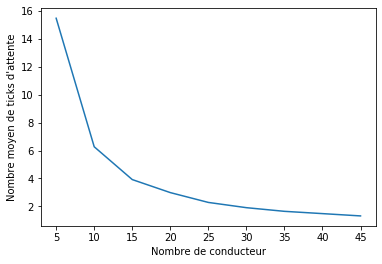

In [235]:
import matplotlib.pyplot as plt
range_vehicules = np.arange(5,50,5)
nb_passagers = 5

big_collector = []

for nb_vehicule in range_vehicules:
    gen = Generator(10, 10, nb_vehicule, nb_vehicule, 5)
    sma = SMA(gen)
    sma.run(1000)
    big_collector.append(np.mean(sma.collector))
    
plt.xlabel("Nombre de conducteur")
plt.ylabel("Nombre moyen de ticks d'attente")
plt.plot(range_vehicules,big_collector)

# Une version plus poussée

Le passager perçoit une partie de l'environnement : sa verticale et son horizontale. Quand un véhicule arrive dans sa case, il regarde le nombre de cases N que ce véhicule lui permet de faire (N=X ou N=Y), et si il y a dans sa perception un autre véhicule à T distance qui lui permettra d'avancer d'un nombre de cases U (dans l'autre direction), avec U-T > N alors il attend celui là (Corwin raisonne sur un "potentiel" : U-T c'est le potentiel de cases dans l'autre direction avec un taux de transfert 0).
Une fois dans le véhicule, le passager fait ce raisonnement là à chaque case, et donc, décide de descendre ou pas, pour en attendre un autre.
Précisions :
- la formule de choix mise en place pourrait être inversée ! c'est une heuristique ! Il y a des heuristiques optimistes et des heuristiques pessimistes (ne serait-ce qu'en inversant l'inégalité).
- Dans cette version le passager peut donc voyager en zig-zag, néanmoins il ne "dépasse" jamais son X et son Y.


# Bibliographie

Philippe Mathieu, Yann Secq.
Environment Updating and Agent Scheduling Policies in Agent-based Simulators. 
ICAART Conference, 2012, pp 170-175

Philippe Mathieu, Sébastien Picault, Yann Secq.
Design Patterns for Environments in Multi-agent Simulations. 
PRIMA Conference, 2015, pp 678-686

Philippe Mathieu, Gildas Morvan, Sébastien Picault.
Multi-level agent-based simulations: Four design patterns. 
Journal of Simulation Modelling Practice and Theory, Janv 2018
